<a href="https://colab.research.google.com/github/98hychoo/Tensorflow/blob/main/Course1_Horse_or_Human_Compacted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*  Image sized to (150,150) instead of (300,300).
*  3 convolutional layers used instead of 5.
*  The training time is reduced.
*  Some classifications less accurate, because two convolutions are removed to handle the smaller images.




--2021-02-17 16:28:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   158MB/s    in 0.9s    

2021-02-17 16:28:57 (158 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-02-17 16:28:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

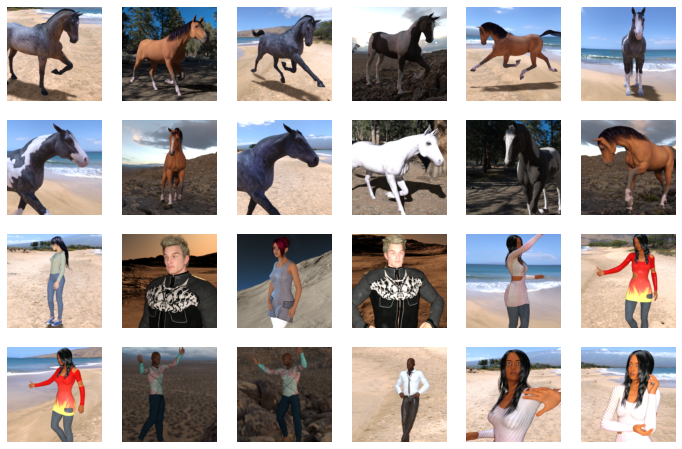

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip


import os
import zipfile
# Extract training data and validation data
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Training/Validation horse and human image directories
train_horse_dir = '/tmp/horse-or-human/horses'
train_human_dir = '/tmp/horse-or-human/humans'
validation_horse_dir = '/tmp/validation-horse-or-human/horses'
validation_human_dir = '/tmp/validation-horse-or-human/humans'
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)
print('Horses: ',train_horse_names[:5])
print('Humans: ',train_human_names[:5])
print('Validation_horses: ', validation_horse_names[:5])
print('Validation human: ', validation_human_names[:5])
print('Total training horse images:', len(os.listdir(train_horse_dir)))
print('Total training human images:', len(os.listdir(train_human_dir)))
print('Total validation horse images: ', len(os.listdir(validation_horse_dir)))
print('Total validation human images: ', len(os.listdir(validation_human_dir)))
# What the images look like
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for the graph, images in  4 x 6 configuration
nrows = 4
ncols = 6
# Index for iterating images
pic_index = 0
# Set up matplotlib fig, and size it to fit 6 x 4 configuration
fig = plt.gcf() # Get the current figure
fig.set_size_inches(ncols *2 , nrows *2 ) # Controlling image size
pic_index += 12
next_horse_pix = [os.path.join(train_horse_dir, fname)
    for fname in train_horse_names[pic_index-12:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
    for fname in train_human_names[pic_index-12:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Define a model
import tensorflow as tf
model = tf.keras.models.Sequential([
    # First Convolution, input size 150 x 150
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape =(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Third Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    # Fourth Convolution
    # tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2), 
    # Fifth Convolution
    #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed in to a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layers
    tf.keras.layers.Dense(512, activation = 'relu'), #(512)
    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])
# We will train our model with the binary_crossentropy loss, because it's a binary classification problem
# and our final activation is a sigmoid.
# (For a refresher on loss metrics, see the Machine Learning Crash Course.)
# We will use the rmsprop optimizer with a learning rate of 0.001.
# During training, we will want to monitor classification accuracy.

# NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient
# descent (SGD), because RMSprop automates learning-rate tuning for us.
# (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training,
# and would work equally well here.)

# DATA PREPROCESSING
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images rescaled
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    # Source directory for training images
    '/tmp/horse-or-human',
    target_size = (150,150),
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size= (150,150),
    batch_size=32,
    class_mode='binary'
)

# Training
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data= validation_generator,
                    validation_steps=8)

# RUNNING THE MODEL
import numpy as np
from keras.preprocessing import image

# predicting images
# path = '/Users/hayoungcho/Desktop/human.jpeg'
# img = image.load_img(path, target_size=(150, 150))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images, batch_size=10)
# if classes[0]>0.5:
#    print(fn + " is a human")
#  else:
#    print(fn + " is a horse")